# TensorFlow - Review Regression

ref: Tensorflow in action

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

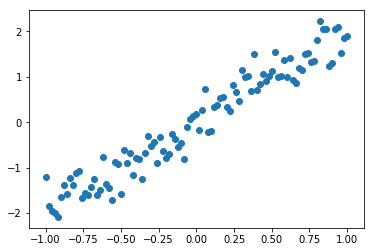

In [2]:
# visualizing raw input
x_train = np.linspace(-1, 1, 101) # 101 evenly spaced numbers btn -1 and 1
# output proportional to input plus some noise
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

plt.scatter(x_train, y_train)
plt.show()

##  solving linear regression


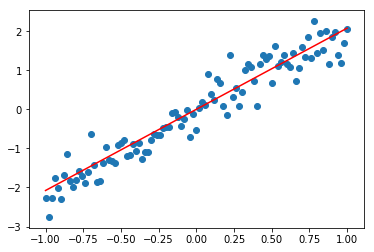

In [3]:
# hyperparameter
learning_rate = 0.01
train_epochs = 100

x_train = np.linspace(-1, 1, 101)
y_train = 2*x_train + np.random.randn(*x_train.shape)*0.33

# set up input and output nodes as placeholders since the values will be
# injected by x_train and y_train
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# define model as y = x*w
def model(X, w):
    return tf.multiply(X, w)

# set up weight variable
w = tf.Variable(0.0, name="weights")

# Define cost function
y_model = model(X, w)
cost = tf.square(Y - y_model)

# Define operation that will be called on each iteration of the 
# learning algorithm
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# set up session and initialize all variables
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# loop through the dataset multiple times
for epoch in range(train_epochs):
    # loop through each item in the dataset
    for (x, y) in zip(x_train, y_train):
        # update the model parameter(s) to try to minimize the cost function
        sess.run(train_op, feed_dict={X: x, Y: y})

# obtain the final parameter value
w_val = sess.run(w)

sess.close()

#plot the original data
plt.scatter(x_train, y_train)

# plot the best fit line
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

## Using a polynomial model

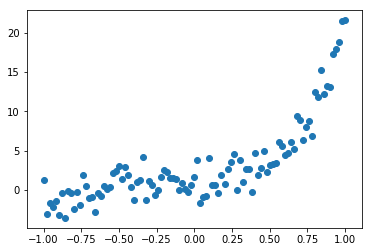

[1.0673593 1.0933979 3.0666945 5.9814053 5.1694636 5.276855 ]


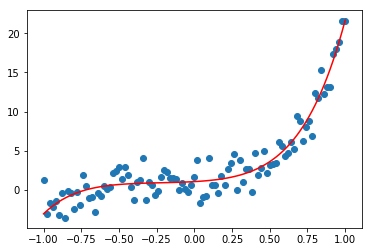

In [4]:
# hyperparameter
learning_rate = 0.01
train_epochs = 100

trX = np.linspace(-1, 1, 101)

# set up output data based on polynomial of degree 5
num_coeffs = 6
trY_coeffs = [1,2,3,4,5,6]
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)

#add some noise
trY  += np.random.randn(*trX.shape) * 1.5

plt.scatter(trX, trY)
plt.show()

# set up input and output nodes as placeholders since the values will be
# injected by x_train and y_train
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# define model as y = x*w
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

# set up weight variable
w = tf.Variable([0.] * num_coeffs, name="parameters")

# Define cost function
y_model = model(X, w)
cost = tf.pow(Y - y_model, 2)

# Define operation that will be called on each iteration of the 
# learning algorithm
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# set up session and initialize all variables
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# loop through the dataset multiple times
for epoch in range(train_epochs):
    # loop through each item in the dataset
    for (x, y) in zip(trX, trY):
        # update the model parameter(s) to try to minimize the cost function
        sess.run(train_op, feed_dict={X: x, Y: y})

# obtain the final parameter value
w_val = sess.run(w)
print(w_val)

sess.close()

#plot the original data
plt.scatter(trX, trY)

# plot the best fit curve
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)

plt.plot(trX, trY2, 'r')
plt.show()

## Implementing Regularization

In [5]:
# splitting dataset into testing and training
def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    #shuffle a list of numbers
    np.random.shuffle(arr)
    #calculate number of training examples based on ratio
    num_train = int(ratio * x_dataset.size)
    x_train = x_dataset[arr[0:num_train]]
    y_train = y_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_test = y_dataset[arr[num_train:x_dataset.size]]
    return x_train, x_test, y_train, y_test

    

In [7]:
# Evaluating regularization parameters

learning_rate = 0.001
training_epochs = 1000
reg_lambda = 0.

x_dataset = np.linspace(-1, 1, 100)

num_coeffs = 9
y_dataset_params = [0.] * num_coeffs
y_dataset_params[2] = 1
y_dataset = 0
for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape) * 0.3

(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)

#define regularised cost function
cost = tf.div(tf.add(tf.reduce_sum(tf.square(Y - y_model)),
                    tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))),
             2*x_train.size)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

#try out various regularization parameters
for reg_lambda in np.linspace(0,1,100):
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X: x_train, Y:y_train})
    final_cost = sess.run(cost, feed_dict={X: x_test, Y:y_test})
    print('reg lambda', reg_lambda)
    print('final cost', final_cost)
    
sess.close()
    

reg lambda 0.0
final cost 0.018098645
reg lambda 0.010101010101010102
final cost 0.013644854
reg lambda 0.020202020202020204
final cost 0.012194935
reg lambda 0.030303030303030304
final cost 0.0115007395
reg lambda 0.04040404040404041
final cost 0.0111308815
reg lambda 0.05050505050505051
final cost 0.010928815
reg lambda 0.06060606060606061
final cost 0.010819746
reg lambda 0.07070707070707072
final cost 0.010763559
reg lambda 0.08080808080808081
final cost 0.01073744
reg lambda 0.09090909090909091
final cost 0.010728068
reg lambda 0.10101010101010102
final cost 0.010727628
reg lambda 0.11111111111111112
final cost 0.0107316
reg lambda 0.12121212121212122
final cost 0.010737446
reg lambda 0.13131313131313133
final cost 0.010743815
reg lambda 0.14141414141414144
final cost 0.010750062
reg lambda 0.15151515151515152
final cost 0.010755944
reg lambda 0.16161616161616163
final cost 0.0107614435
reg lambda 0.17171717171717174
final cost 0.010766647
reg lambda 0.18181818181818182
final cost

# Classification

## Using linear regression for classification

0 8.802322
100 2.7117932
200 1.8335024
300 1.7037566
400 1.6845901
500 1.6817586
600 1.6813401
700 1.6812783
800 1.6812693
900 1.6812681
learned parameters [ 1.2063149  -0.20660776]
accuracy 0.9


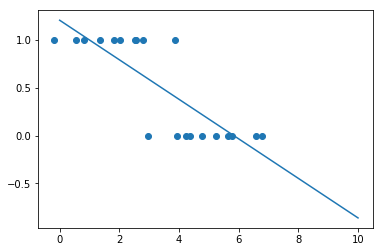

In [15]:
# Initialize fake data, 10 instances of each label
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
# initialize corresponding labels
labels = [0.] * len(x_label0) + [1.] * len(x_label1)
#plot the data
plt.scatter(xs, labels)
# global parameters
learning_rate = 0.001
training_epochs = 1000
# set up place holder nodes for input/output pairs
X = tf.placeholder("float")
Y = tf.placeholder("float")
# define linear y=w1*x + w0 model
def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)),
                  tf.multiply(w[0], tf.pow(X, 0)))

w = tf.Variable([0., 0.], name="parameters")
y_model = model(X, w)
#define cost function
cost = tf.reduce_sum(tf.square(Y - y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Executing the graph
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# run the learning operation multiple times
for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    # record the cost computed with the current parameters
    current_cost = sess.run(cost, feed_dict={X:xs, Y:labels})
    if epoch % 100 == 0:
        print(epoch, current_cost)
        
w_val = sess.run(w)
print('learned parameters', w_val)


# measuring accuracy
correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))

print('accuracy', sess.run(accuracy, feed_dict={X:xs, Y:labels}))

sess.close()

all_xs = np.linspace(0,10,100)
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.show()

## Using one-dimensional logistic regression

0 0.6931461
100 0.43972683
200 0.32903346
300 0.26962143
400 0.23278567
500 0.20767662
600 0.18941128
700 0.1754877
accuracy 0.9735


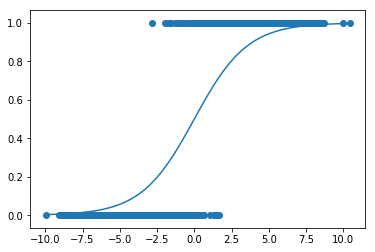

In [20]:
# Initialize fake data, 10 instances of each label
x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
# initialize corresponding labels
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

#plot the data
plt.scatter(xs, ys)
# global parameters
learning_rate = 0.001
training_epochs = 1000

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

# set up place holder nodes for input/output pairs
X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0.], name="parameters", trainable=True)
#define the model using tensorflow's sigmoid function
y_model = tf.sigmoid(w[1] * X + w[0])
#define cost function
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Executing the graph
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# run the learning operation multiple times
prev_err = 0
for epoch in range(training_epochs):
    err, _ = sess.run([cost, train_op], {X: xs, Y: ys})
    # record the cost computed with the current parameters
    if epoch % 100 == 0:
        print(epoch, err)
    if abs(prev_err - err) < 0.0001:
        break
    prev_err = err
        
w_val = sess.run(w, {X: xs, Y: ys})


# measuring accuracy
correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))

print('accuracy', sess.run(accuracy, feed_dict={X:xs, Y:ys}))

sess.close()

all_xs = np.linspace(-10,10,100)
plt.plot(all_xs, sigmoid((all_xs*w_val[1] + w_val[0])))
plt.show()

## Softmax Regression

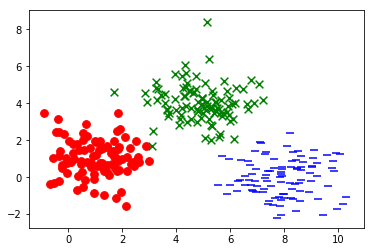

In [21]:
#visualizing multiclass data

#generate points near (1,1)
x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
#generate points near (5, 4)
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
# generate points near (8, 0)
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))

#visualize the three labels on a scatter plot
plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

In [49]:
# setting up training and test data for multiclass classification

#combine all input data into one big matrix
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))
xs = np.vstack((xs_label0, xs_label1, xs_label2))

# create the corresponding one-hot labels
labels = np.matrix([[1.,0.,0.]] * len(x1_label0) + \
                   [[0.,1.,0.]] * len(x1_label1) + \
                   [[0.,0.,1.]] * len(x1_label2))

# shuffle the dataset
arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

# construct test dataset and labels
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))

test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1.,0.,0.]] * 10 + \
                   [[0.,1.,0.]] * 10 + \
                   [[0.,0.,1.]] * 10)

# shape of dataset tells number of examples and features per example
train_size, num_features = xs.shape

In [63]:
# using softmax regression

learning_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])

# Define the model parameters
W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
# Design the softmax model
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [72]:
# Executing the graph

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    # loop only enough times to complete a single pass through the dataset
    for step in range(training_epochs * train_size // batch_size):
        #Retrieve a subset of the dataset corresponding to the current batch
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset: (offset + batch_size)]
        err, _ = sess.run([cost, train_op], 
                          feed_dict={X: batch_xs, Y:batch_labels})
        if step % 500 == 0:
            print(step, err)
        
    W_val = sess.run(W)
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    print('accuracy', accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))

0 109.86121
500 2.8352435
1000 2.1534302
1500 1.7784693
2000 1.8094132
2500 1.5542593
w [[-2.8192399  0.4643158  2.3549137]
 [ 0.0701506  2.404887  -2.4750402]]
b [10.599448  -4.0735254 -6.525921 ]
accuracy 1.0


In [68]:
(2 * batch_size) % train_size

200

In [65]:
train_size

300